This notebook serves as a pipeline demonstration, it combines the detection and recognition components to develop an E2E Armenian HTR system. 

In [ ]:
import wrapper
import importlib

importlib.reload(wrapper)
from wrapper import (
    load_detector,
    load_recognizer,
    recognize_from_image,
    get_model_config,
)
import matplotlib.pyplot as plt

There are two main recognizers available: SimpleHTR and Clova AI you can load the desired model configuration using the function below.

**IMPORTANT NOTE** : By default, the decoder for SimpleHTR is set as `wbs` (Word Beam Search), however, it requires various dependencies and c++ installation. If you want to avoid setting up the decoder, a slightly less powerful decoder can be specified such as bs (regular Beam Search), or if `decoder_name` is set as `None`, the regular Greedy Decoding will be used instead. 

In [ ]:
image_path = "../SimpleHTR/data/test_picture.jpg"  # Sample image for an inference

In [ ]:
import os

os.path.exists(image_path)  # make sure it exists

True

### loading the detector

In [50]:
detector, refine_net = load_detector(
    craft_weights_path="../CRAFT-pytorch/weights/craft_mlt_25k.pth",
    use_refiner=True,
    refiner_weights_path="../CRAFT-pytorch/weights/craft_refiner_CTW1500.pth",
)

c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\anial\Downloads\capstone-htr\pipeline\wrapper.py:56: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the de

### initializing the models

In [ ]:
model_args_simplehtr = get_model_config()  # SimpleHTR

In [52]:
model_args_simplehtr

{'model_path': '../SimpleHTR/model_checkpoints_armo/',
 'char_list_path': '../SimpleHTR/model_arm/charList.txt',
 'decoder': 'wbs',
 'corpus_path': '../SimpleHTR/data/corpus.txt'}

In [ ]:
model_simplehtr = load_recognizer(**model_args_simplehtr)  # getting the SimpleHTR model

c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\legacy_tf_layers\normalization.py:307: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  warnings.warn(
c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\layers\legacy_rnn\rnn_cell_impl.py:903: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
c:\Users\anial\Downloads\capstone-htr\simplehtr38\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1727: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


Python: 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
Tensorflow: 2.4.0
[DEBUG] Looking for model in: c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_checkpoints_armo
Init with stored values from c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_checkpoints_armo\snapshot-5
INFO:tensorflow:Restoring parameters from c:\Users\anial\Downloads\capstone-htr\SimpleHTR\model_checkpoints_armo\snapshot-5


In [ ]:
model_args_clova = get_model_config("ClovaAI")  # ClovaAI

In [58]:
model_args_clova

{'model_path': '../deep-text-recognition-benchmark/saved_models/best_model_epoch_27.pth'}

In [ ]:
model_clova = load_recognizer(
    model_name="ClovaAI", **model_args_clova
)  # getting the ClovaAI model

c:\Users\anial\Downloads\capstone-htr\pipeline\wrapper.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_path, map_location='cpu')


### sample inference - SimpleHTR

Հայկական գրերը ներկայացված են մի շարք համակարգերով որոնք իրարից տարբերվում են տառերի գծագիր տեսքով ու կառուցվածքով


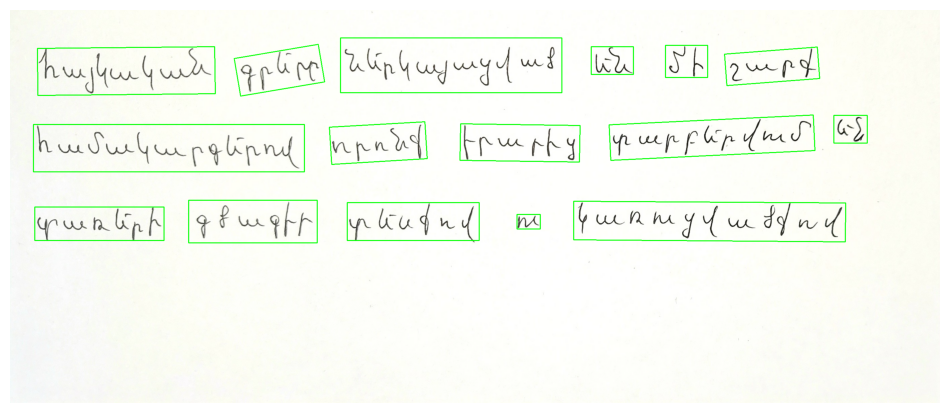

In [ ]:
text, visualized = recognize_from_image(
    image_path, detector, refine_net, recognizer=model_simplehtr
)
print(text)  # Getting the predictions in a reading order + the bounding boxes

plt.figure(figsize=(12, 12))
plt.imshow(visualized)
plt.axis("off")
plt.show()

### sample inference - ClovaAI

Հայկական գրերը ներկայացված են մի շարք համակարգերով որոնք իրարից տարբերվում են տառերի գծագիր տեսքով ու կառուցվածքով


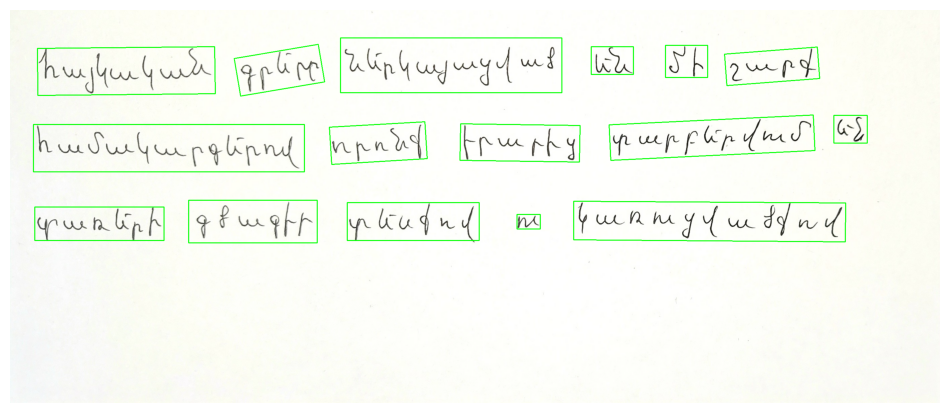

: 

In [ ]:
text, visualized = recognize_from_image(
    image_path, detector, refine_net, recognizer=model_clova
)
print(text)  # Getting the predictions in a reading order + the bounding boxes

plt.figure(figsize=(12, 12))
plt.imshow(visualized)
plt.axis("off")
plt.show()